In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
data['Classification']=le.fit_transform(data['Classification'])

In [10]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Logistic Regression

In [33]:
data=data.dropna()

In [45]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [38]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [40]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [41]:
y_pred=model.predict(x_test)

In [44]:
y_pred

array([1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1])

In [46]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

# kNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [48]:
metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

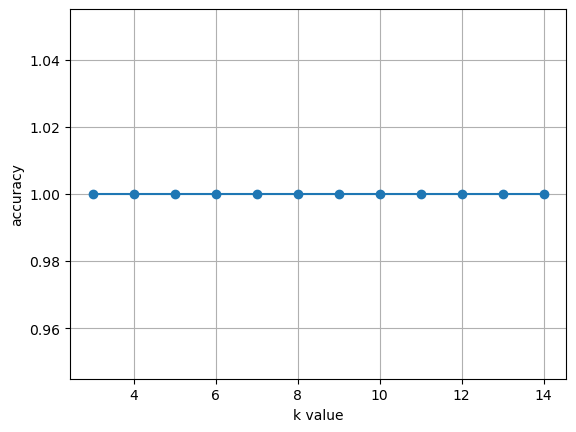

In [49]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [50]:
classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 1.0


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [54]:
y_pred = model.predict([[25,5665,0,1]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
y_pred

array([0])

# SVM

In [56]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
y_pred_svm=svmclf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [59]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.9393939393939394


In [60]:
print(confusion_matrix(y_test,y_pred_svm))

[[12  0  0]
 [ 0 11  2]
 [ 0  0  8]]


In [61]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [62]:
y_pred_svm=svmclf.predict(x_test)

In [63]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.8181818181818182


In [64]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [65]:
y_pred_svm=svmclf.predict(x_test)

In [66]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.9393939393939394


# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred_dt=dt_clf.predict(x_test)

In [69]:
print('accuracy=',accuracy_score(y_test,y_pred_dt))

accuracy= 0.8787878787878788


In [70]:
print(confusion_matrix(y_test,y_pred_dt))

[[12  0  0]
 [ 0  9  4]
 [ 0  0  8]]


# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred_rf=rf_clf.predict(x_test)

In [73]:
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 0.9090909090909091


In [74]:
print(confusion_matrix(y_test,y_pred_rf))

[[12  0  0]
 [ 0 10  3]
 [ 0  0  8]]


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [76]:
y_pred_rf=rf_clf.predict(x_test)

In [77]:
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 0.8787878787878788


In [78]:
print(confusion_matrix(y_test,y_pred_rf))

[[12  0  0]
 [ 0  9  4]
 [ 0  0  8]]


In [81]:
y_pred_rf=rf_clf.predict([[1,25,50,2536]])

In [82]:
y_pred_rf

array([2])